# Credit Risk 

Final Task Project Based Data Science - ID/X Partners

In [40]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

## Data Understanding

In [2]:
df=pd.read_csv("D:/rakamin/vix pbi/data scientist idx partners/final task/loan_data_2007_2014.csv", sep=",")
pd.set_option('display.max_columns', None)

C:\Users\Lenovo Indonesia\AppData\Local\Temp\ipykernel_28204\819365391.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("D:/rakamin/vix pbi/data scientist idx partners/final task/loan_data_2007_2014.csv", sep=",")


In [3]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Insight

In [5]:
df['policy_code'].value_counts()

policy_code
1    466285
Name: count, dtype: int64

## Data Preparation

In [6]:
# cek duplikat 
df.duplicated().sum()

0

### Feature Engineering

#### credit_risk

Pemberian label credit_risk dapat ditentukan dari variabel loan_status dimana kategori 

In [7]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [8]:
def credit(x):
    if x=='Charged Off':
        return 0
    elif x=='Late (31-120 days)':
        return 0
    elif x=='Default':
        return 0
    elif x=='Late (16-30 days)':
        return 0
    elif x=='Does not meet the credit policy. Status:Charged Off':
        return 0
    else:
        return 1
df['credit']=df['loan_status'].apply(lambda x: credit(x))
df['credit'].head(5)

0    1
1    0
2    1
3    1
4    1
Name: credit, dtype: int64

In [9]:
df['credit'].value_counts()

credit
1    414099
0     52186
Name: count, dtype: int64

#### term

In [10]:
# cek term unique
df['term'].unique()
# split
df['term']=df['term'].apply(lambda x: int(x.split(' m')[0]))
df['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

#### emp_length

In [11]:
# split emp_length
df['emp_length'].unique()
df.dropna(subset=['emp_length'], inplace=True)
emp_length=df['emp_length'].apply(lambda x: x.split('y')[0])
emp_length=emp_length.apply(lambda x: x.replace('+','').replace('<',''))
df['emp_length']=emp_length.astype(int)
df['emp_length'].head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int32

#### issue_d

Pada variabel issue_d yang memiliki format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut dalam satuan bulan. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2018. Dalam contoh ini, saya menggunakan tanggal 2018-01-01 sebagai reference date.

In [12]:
# konversi tanggal mulai peminjaman
def konversi_tanggal(tanggal_str):
    return datetime.strptime(tanggal_str, "%b-%y")

df['date_issued']=df['issue_d'].apply(konversi_tanggal)
df['date_issued'].head()
df['month_issued'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - df['date_issued']) / np.timedelta64(1, 'M')))
df[['date_issued', 'month_issued']]

,date_issued,month_issued
0,2011-12-01,72.0
1,2011-12-01,72.0
2,2011-12-01,72.0
3,2011-12-01,72.0
4,2011-12-01,72.0
...,...,...
466280,2014-01-01,47.0
466281,2014-01-01,47.0
466282,2014-01-01,47.0
466283,2014-01-01,47.0


#### earliest_cr_line

In [13]:
# konversi tanggal mulai berlaku
df['earliest_cr_line'] = df['earliest_cr_line'].astype(str)
df = df[df['earliest_cr_line'] != 'nan']
df['release_date'] = df['earliest_cr_line'].apply(konversi_tanggal)
df['release_date'].head()
df['month_release'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - df['release_date']) / np.timedelta64(1, 'M')))
df[['release_date', 'month_release']]

C:\Users\Lenovo Indonesia\AppData\Local\Temp\ipykernel_28204\1810548397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = df['earliest_cr_line'].apply(konversi_tanggal)
C:\Users\Lenovo Indonesia\AppData\Local\Temp\ipykernel_28204\1810548397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_release'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - df['release_date']) / np.timedelta64(1, 'M')))


,release_date,month_release
0,1985-01-01,389.0
1,1999-04-01,221.0
2,2001-11-01,190.0
3,1996-02-01,258.0
4,1996-01-01,259.0
...,...,...
466280,2003-04-01,174.0
466281,1997-06-01,243.0
466282,2001-12-01,190.0
466283,2003-02-01,176.0


#### last_pymnt_d

In [14]:
# konversi tanggal terakhir pembayaran
df['last_pymnt_d']=df['last_pymnt_d'].astype(str)
df=df[df['last_pymnt_d']!='nan']
df['last_pymnt']=df['last_pymnt_d'].apply(konversi_tanggal)
df['last_pymnt'].head()
df['month_last_pymnt'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - df['last_pymnt']) / np.timedelta64(1, 'M')))
df[['last_pymnt', 'month_last_pymnt']]

C:\Users\Lenovo Indonesia\AppData\Local\Temp\ipykernel_28204\976910347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_pymnt_d']=df['last_pymnt_d'].astype(str)


,last_pymnt,month_last_pymnt
0,2015-01-01,35.0
1,2013-04-01,56.0
2,2014-06-01,42.0
3,2015-01-01,35.0
4,2016-01-01,24.0
...,...,...
466280,2016-01-01,24.0
466281,2014-12-01,36.0
466282,2016-01-01,24.0
466283,2014-12-01,36.0


#### next_pymnt_d

In [15]:
# konversi tanggal next pembayaran
df['next_pymnt_d']=df['next_pymnt_d'].astype(str)
df=df[df['next_pymnt_d']!='nan']
df['next_pymnt']=df['next_pymnt_d'].apply(konversi_tanggal)
df['next_pymnt'].head()
df['month_next_pymnt'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - df['next_pymnt']) / np.timedelta64(1, 'M')))
df[['next_pymnt', 'month_next_pymnt']]

,next_pymnt,month_next_pymnt
4,2016-02-01,23.0
6,2016-02-01,23.0
32,2016-01-01,24.0
39,2016-01-01,24.0
61,2016-01-01,24.0
...,...,...
466274,2016-02-01,23.0
466279,2016-02-01,23.0
466280,2016-02-01,23.0
466282,2016-02-01,23.0


#### last_credit_pull_d

In [16]:
# konversi tanggal pengecekan history credit
df['last_credit_pull_d']=df['last_credit_pull_d'].astype(str)
df=df[df['last_credit_pull_d']!='nan']
df['last_credit_pull']=df['last_credit_pull_d'].apply(konversi_tanggal)
df['last_credit_pull'].head()
df['month_last_credit_pull'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - df['last_credit_pull']) / np.timedelta64(1, 'M')))
df[['last_credit_pull', 'month_last_credit_pull']]

,last_credit_pull,month_last_credit_pull
4,2016-01-01,24.0
6,2016-01-01,24.0
32,2016-01-01,24.0
39,2016-01-01,24.0
61,2016-01-01,24.0
...,...,...
466274,2016-01-01,24.0
466279,2016-01-01,24.0
466280,2016-01-01,24.0
466282,2015-12-01,25.0


#### risk_score_type

Untuk aplikasi sebelum 5 November 2013 skor risiko adalah skor FICO peminjam. Untuk aplikasi setelah 5 November 2013 skor risikonya adalah skor Vantage Peminjam

In [17]:
df=df.reset_index()
df.shape

(226677, 87)

In [18]:
df['5_nov_2013']=[datetime(2013, 11, 5)]*226677
def risk(x,y):
    if x<y:
        return 'FICO'
    else: 
        return 'Vantage'
df['risk_score_type']=df.apply(lambda row: risk(row['date_issued'], row['5_nov_2013']), axis=1)
df[['date_issued', '5_nov_2013', 'risk_score_type']]

,date_issued,5_nov_2013,risk_score_type
0,2011-12-01,2013-11-05,FICO
1,2011-12-01,2013-11-05,FICO
2,2011-12-01,2013-11-05,FICO
3,2011-12-01,2013-11-05,FICO
4,2011-12-01,2013-11-05,FICO
...,...,...,...
226672,2014-01-01,2013-11-05,Vantage
226673,2014-01-01,2013-11-05,Vantage
226674,2014-01-01,2013-11-05,Vantage
226675,2014-01-01,2013-11-05,Vantage


### Handling Missing Value

In [19]:
# variabel dependen
df=df[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'month_issued', 'risk_score_type', 'pymnt_plan', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'month_release', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'month_last_pymnt', 'last_pymnt_amnt', 'month_next_pymnt', 
       'month_last_credit_pull', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
       'total_rev_hi_lim', 'credit']]
df=df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226677 entries, 0 to 226676
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        226677 non-null  int64  
 1   loan_amnt                    226677 non-null  int64  
 2   funded_amnt                  226677 non-null  int64  
 3   term                         226677 non-null  int64  
 4   int_rate                     226677 non-null  float64
 5   installment                  226677 non-null  float64
 6   grade                        226677 non-null  object 
 7   sub_grade                    226677 non-null  object 
 8   emp_length                   226677 non-null  int32  
 9   home_ownership               226677 non-null  object 
 10  annual_inc                   226677 non-null  float64
 11  verification_status          226677 non-null  object 
 12  month_issued                 226677 non-null  float64
 13 

In [20]:
df['mths_since_last_delinq'].fillna(0, inplace=True)
df['mths_since_last_record'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['mths_since_last_major_derog'].fillna(0, inplace=True)
df['tot_coll_amt'].fillna(0, inplace=True)
df['tot_cur_bal'].fillna(0, inplace=True)
df['total_rev_hi_lim'].fillna(0, inplace=True)

In [21]:
df_credit=df[['credit']]
df.drop(columns=['credit'], inplace=True)

### Feature Transformation

#### One-Hot Encoding

In [22]:
df_str=df[['home_ownership', 'verification_status', 'risk_score_type', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status']]
df_onehot=pd.get_dummies(df_str)
df_onehot=df_onehot.replace({False:0, True:1})
df_onehot.sample(10)

,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,risk_score_type_FICO,risk_score_type_Vantage,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
45420,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
211918,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
138889,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
95259,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
104225,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
93398,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11543,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
70087,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10358,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
73724,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Label Encoding

In [23]:
df.sub_grade.unique()

array(['B5', 'C5', 'D3', 'F4', 'D4', 'B1', 'C1', 'C4', 'D2', 'C3', 'E2',
       'B2', 'D5', 'F2', 'E3', 'C2', 'B3', 'G3', 'B4', 'E5', 'A4', 'E4',
       'F1', 'F3', 'E1', 'A5', 'F5', 'G1', 'G4', 'G2', 'G5', 'D1', 'A3',
       'A2', 'A1'], dtype=object)

In [24]:
grade={'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
df_grade=df[['grade']]
df_grade=df_grade['grade'].map(grade)
df_grade.sample(5)

100628    2
56056     4
130598    3
178923    1
112255    2
Name: grade, dtype: int64

In [25]:
subgrade={'A1':0, 'A2':1, 'A3':2, 'A4':3, 'A5':4, 
          'B1':5, 'B2':6, 'B3':7, 'B4':8, 'B5':9,
          'C1':10, 'C2':11, 'C3':12, 'C4':13, 'C5':14,
          'D1':15, 'D2':16, 'D3':17, 'D4':18, 'D5':19,
          'E1':20, 'E2':21, 'E3':22, 'E4':23, 'E5':24,
          'F1':25, 'F2':26, 'F3':27, 'F4':28, 'F5':29,
          'G1':30, 'G2':31, 'G3':32, 'G4':33, 'G5':34}
df_subgrade=df[['sub_grade']]
df_subgrade=df_subgrade['sub_grade'].map(subgrade)
df_subgrade.sample(5)

100712     9
25070     14
109223     7
60410      6
184127    13
Name: sub_grade, dtype: int64

#### Standardized

In [26]:
df_numeric1=[col for col in df.select_dtypes(include='float64')]
df_float64=df[df_numeric1]
df_numeric2=[col for col in df.select_dtypes(include='int64')]
df_int64=df[df_numeric2]
df_numeric3=[col for col in df.select_dtypes(include='int32')]
df_int32=df[df_numeric3]
df_numeric=pd.concat([df_float64, df_int64, df_int32], axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler

numeric_cols = [col for col in df_numeric.columns.tolist()]
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df_numeric), columns=numeric_cols)
std.head()        

,int_rate,installment,annual_inc,month_issued,dti,delinq_2yrs,month_release,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,month_last_pymnt,last_pymnt_amnt,month_next_pymnt,month_last_credit_pull,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,index,loan_amnt,funded_amnt,term,revol_bal,emp_length
0,-0.273654,-1.577636,0.076417,2.788109,-0.003669,-0.378757,0.247827,-0.674004,0.971114,-0.373647,0.660452,-0.309703,-0.160251,1.090337,-1.209061,-1.008114,-0.940378,-0.769573,-0.111121,-0.153009,-0.739460,-0.122939,-0.088425,-0.490848,-0.066738,-0.11795,-0.898814,-0.716068,-1.732043,-1.457765,-1.457548,1.39377,0.443988,-1.497019
1,0.480199,-1.156449,-0.520337,2.788109,0.700915,-0.378757,-0.987931,0.228222,-0.720403,-0.373647,-0.892043,-0.309703,1.234992,-1.241565,-1.038160,-0.240722,-0.315736,-0.028782,-0.111121,-0.153009,-0.555889,-0.122939,-0.088425,-0.490848,-0.066738,-0.11795,-0.898814,-0.716068,-1.732028,-0.983675,-0.983260,1.39377,0.008723,0.497157
2,0.480199,-0.856319,-0.843780,2.788109,0.614897,-0.378757,0.104391,0.228222,2.306522,-0.373647,-0.115796,-0.309703,0.266685,0.485770,-0.915395,0.305742,0.160452,0.445644,-0.111121,-0.153009,-0.425079,0.044151,-0.088425,-0.490848,-0.066738,-0.11795,-0.898814,-0.716068,-1.732013,-0.628108,-0.627545,1.39377,-0.059140,-1.212136
3,-0.273654,-0.693799,-0.882122,2.788109,-0.244012,-0.378757,-0.513488,2.032675,-0.720403,-0.373647,-1.086105,-0.309703,-0.331905,-0.118797,-0.839585,0.601145,0.595047,0.402297,-0.111121,-0.153009,-0.354245,0.044151,-0.088425,-0.490848,-0.066738,-0.11795,-0.898814,-0.716068,-1.731997,-0.331802,-0.331115,1.39377,-0.319469,-1.497019
4,0.782202,-0.935500,-0.647008,2.788109,0.189870,-0.378757,-1.087233,0.228222,-0.720403,-0.373647,-1.280166,-0.309703,0.059819,-1.673399,-0.950886,0.163253,-0.016868,0.411883,-0.111121,-0.153009,-0.459589,0.044151,-0.088425,-0.490848,-0.066738,-0.11795,-0.898814,-0.716068,-1.731982,0.260811,-0.752045,1.39377,-0.294323,-0.072608


#### Exploratory Data Analysis

##### Outlier

<Axes: >

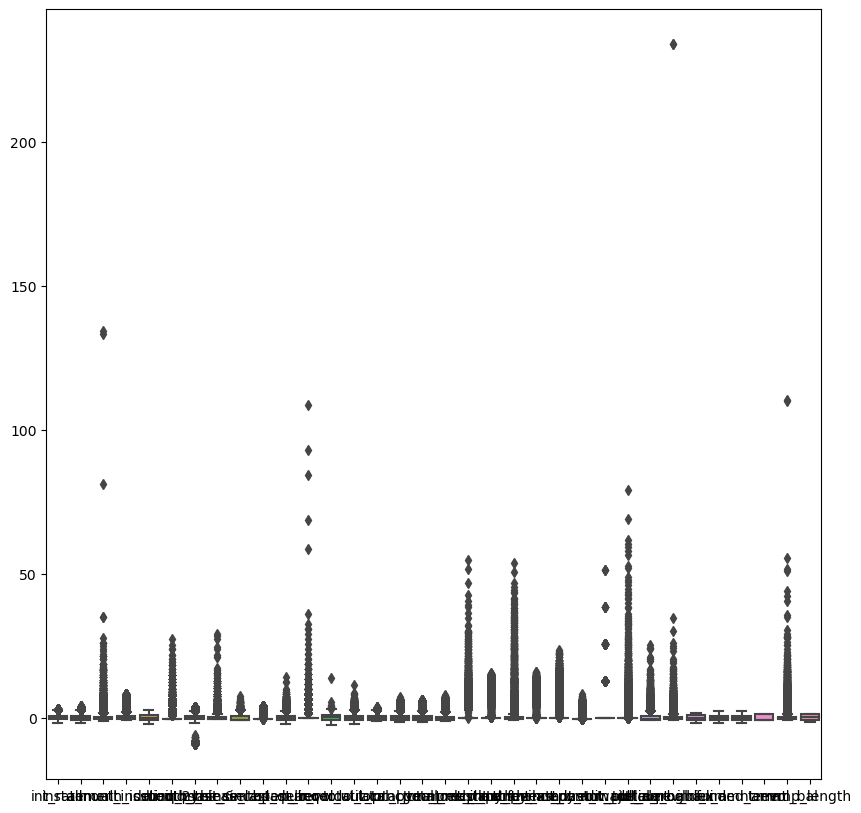

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=std)

In [29]:
# Z-Score
for i in numeric_cols:
    upper_limit = std[i].mean() + 3*std[i].std()
    lower_limit = std[i].mean() - 3*std[i].std()

    std[i] = np.where(
        std[i]>upper_limit,
        upper_limit,
        np.where(
            std[i]<lower_limit,
            lower_limit,
            std[i]
        )
    )

<Axes: >

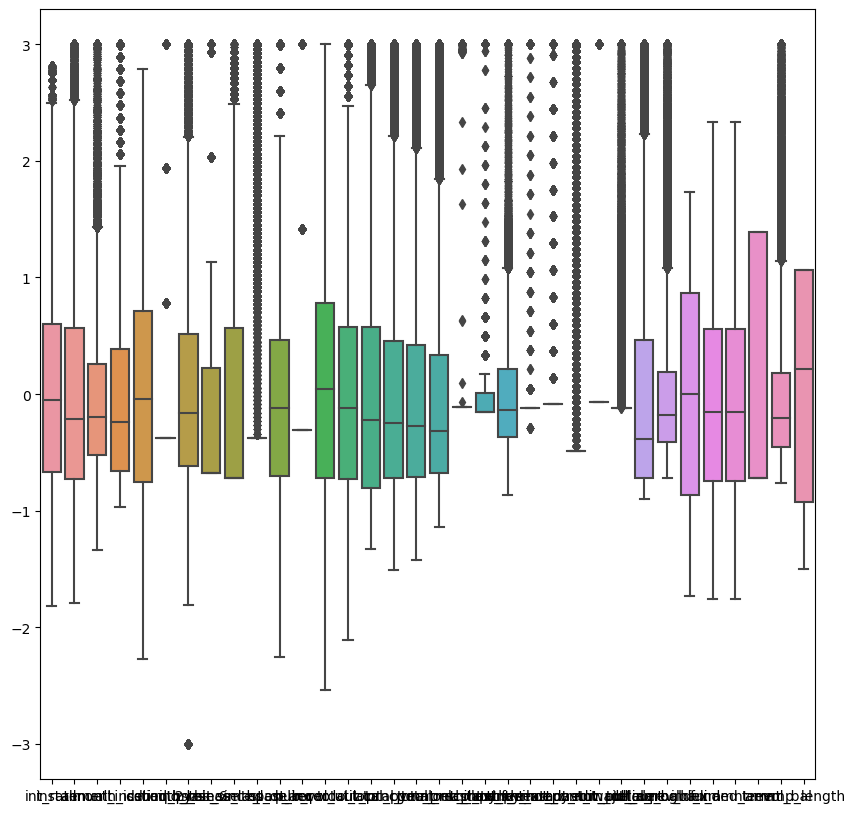

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=std)

##### Correlation Matrix

C:\Users\Lenovo Indonesia\AppData\Local\Temp\ipykernel_28204\917870472.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<Axes: >

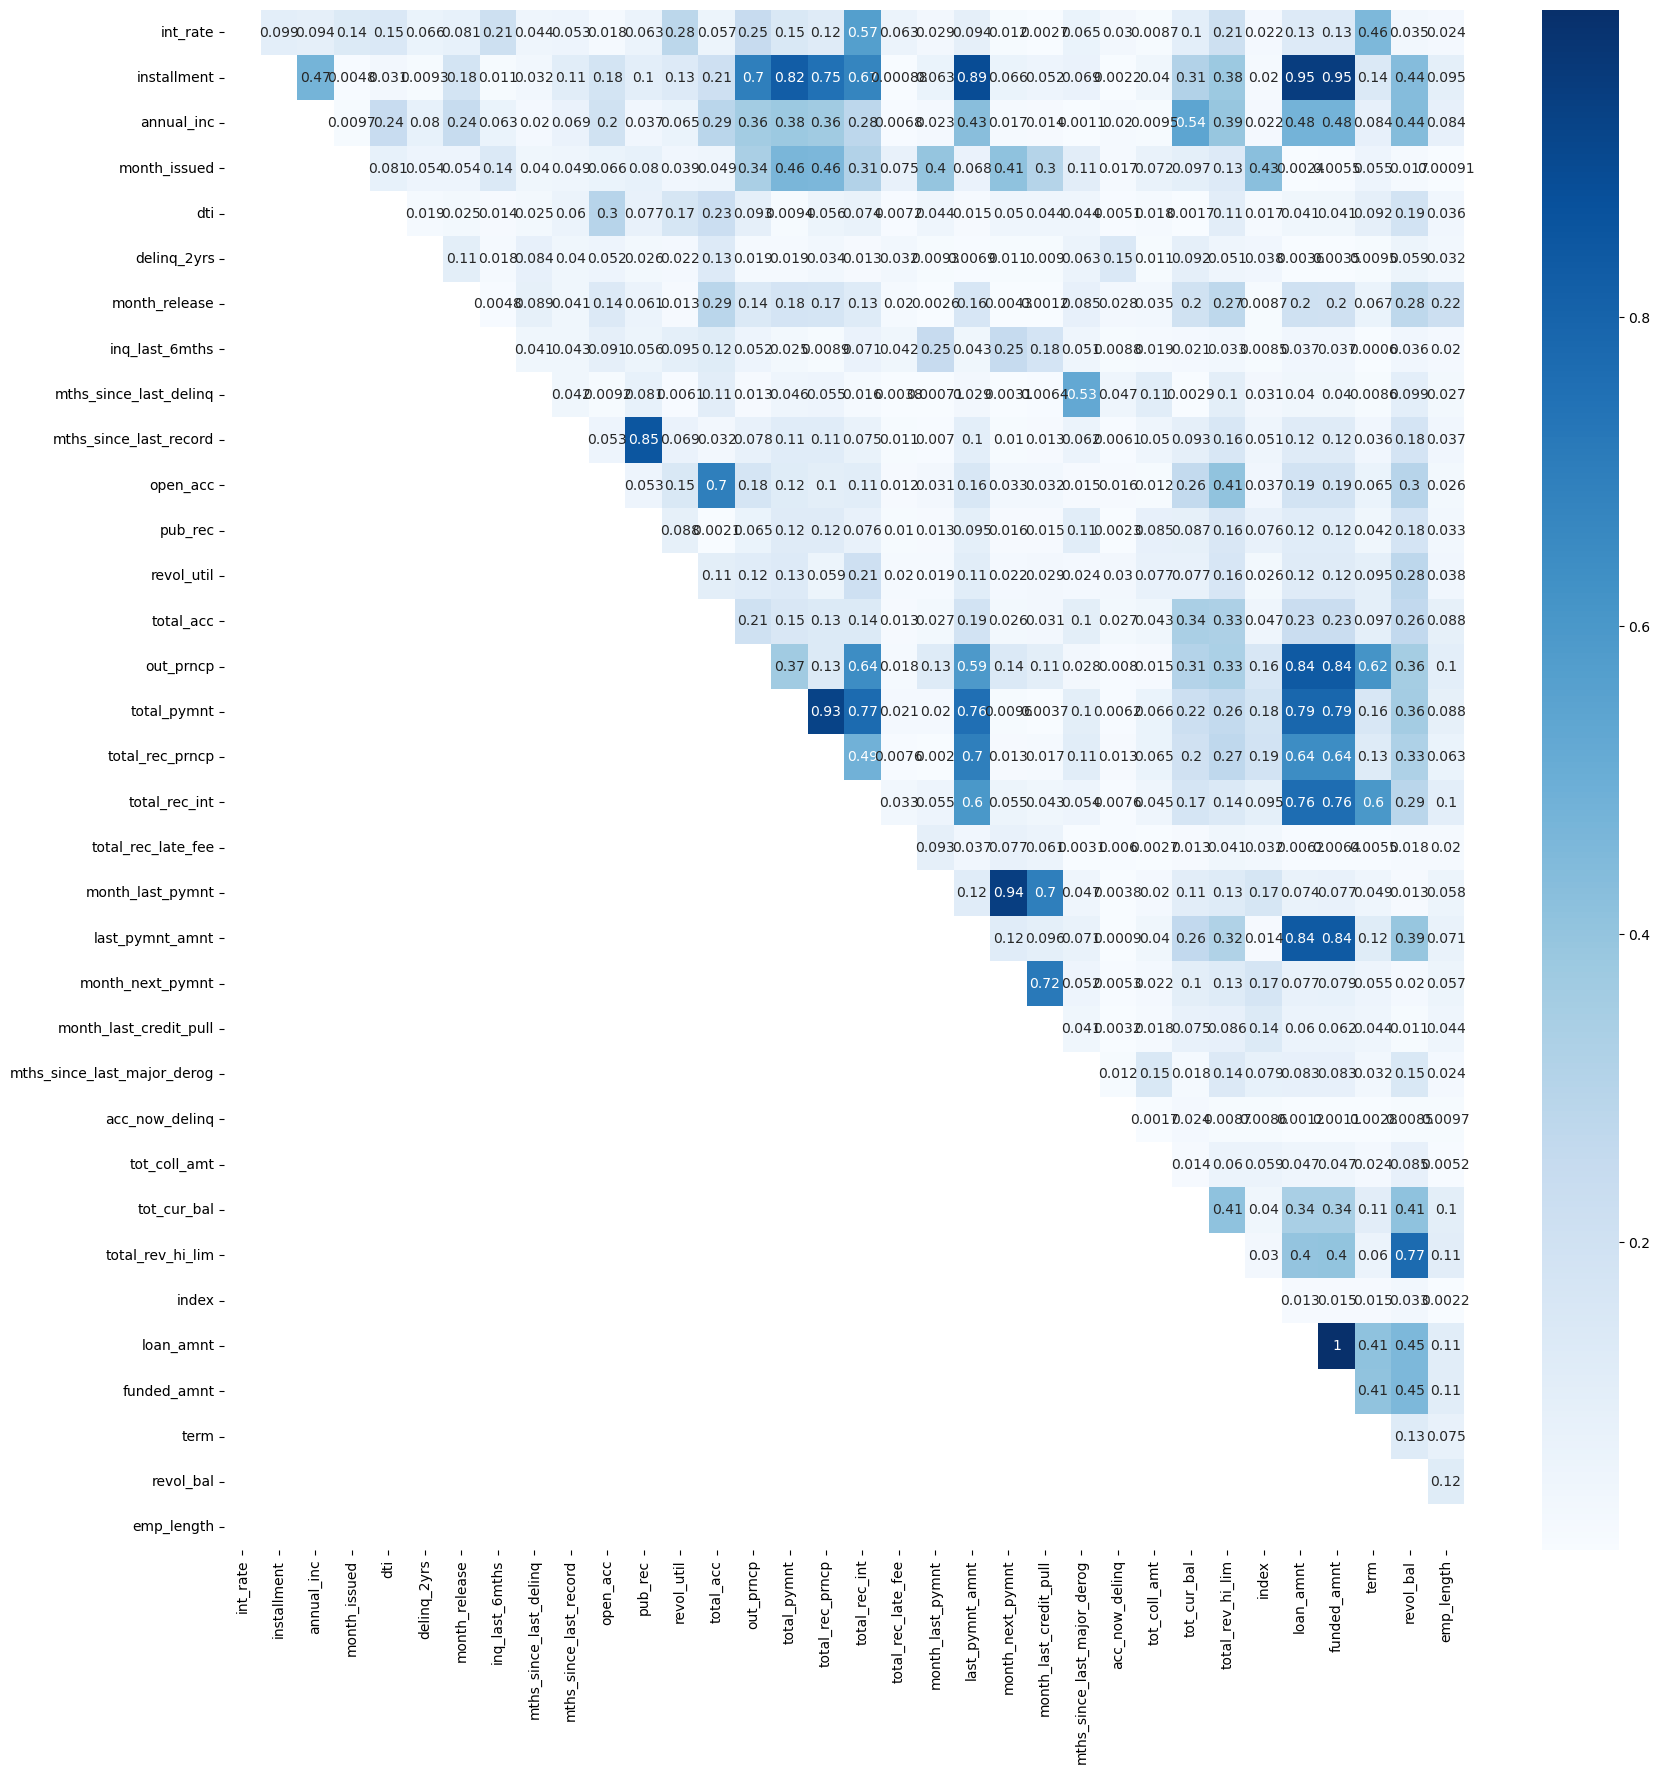

In [31]:
# correlation matrix
corr_matrix = std.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap='Blues')

Karena terdapat beberapa variabel yang memiliki korelasi yang sangat tinggi maka salah satu variabel yang berkorelasi sangat tinggi tersebut dihapus. Dalam hal ini variabel yang sangat tinggi yang bernilai di atas 0.9

In [32]:
std.drop(columns=['funded_amnt', 'total_rec_prncp', 'month_next_pymnt', 'installment'], inplace=True)

C:\Users\Lenovo Indonesia\AppData\Local\Temp\ipykernel_28204\159032047.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<Axes: >

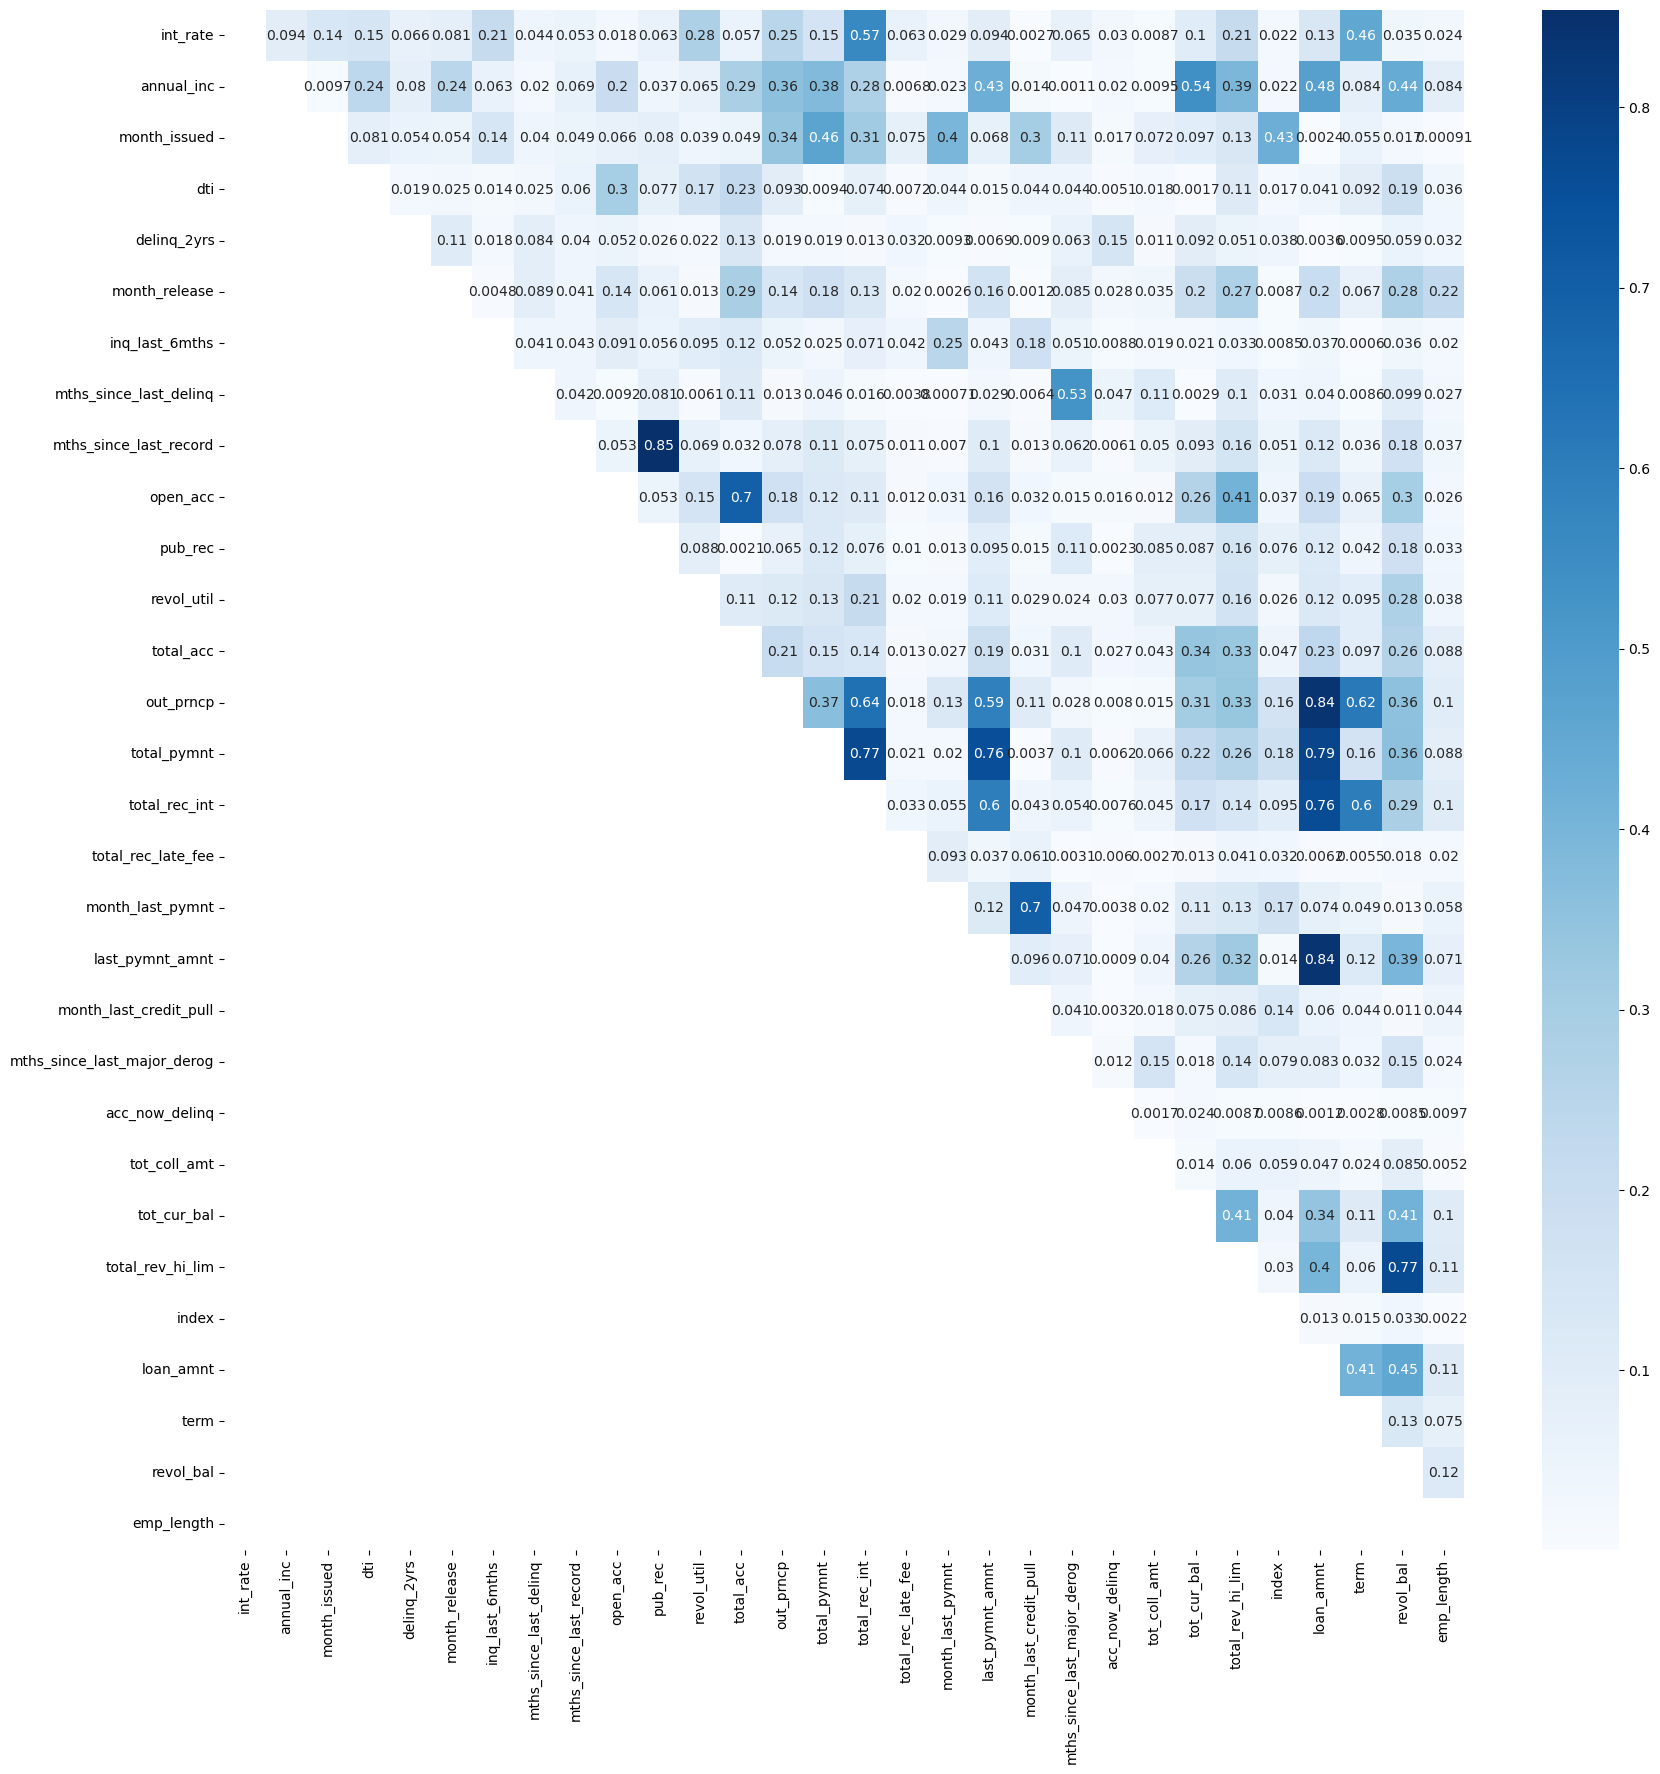

In [33]:
corr_matrix = std.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap='Blues')

#### Transformed Data

In [34]:
df_model=pd.concat([std, df_grade, df_subgrade, df_onehot, df_credit], axis=1)
df_model.head()

,int_rate,annual_inc,month_issued,dti,delinq_2yrs,month_release,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,month_last_pymnt,last_pymnt_amnt,month_last_credit_pull,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,index,loan_amnt,term,revol_bal,emp_length,grade,sub_grade,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,risk_score_type_FICO,risk_score_type_Vantage,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,credit
0,-0.273654,0.076417,2.788109,-0.003669,-0.378757,0.247827,-0.674004,0.971114,-0.373647,0.660452,-0.309703,-0.160251,1.090337,-1.209061,-1.008114,-0.769573,-0.111121,-0.153009,-0.739460,-0.088425,-0.490848,-0.066738,-0.11795,-0.898814,-0.716068,-1.732043,-1.457765,1.39377,0.443988,-1.497019,1,9,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0.480199,-0.520337,2.788109,0.700915,-0.378757,-0.987931,0.228222,-0.720403,-0.373647,-0.892043,-0.309703,1.234992,-1.241565,-1.038160,-0.240722,-0.028782,-0.111121,-0.153009,-0.555889,-0.088425,-0.490848,-0.066738,-0.11795,-0.898814,-0.716068,-1.732028,-0.983675,1.39377,0.008723,0.497157,2,14,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0.480199,-0.843780,2.788109,0.614897,-0.378757,0.104391,0.228222,2.306522,-0.373647,-0.115796,-0.309703,0.266685,0.485770,-0.915395,0.305742,0.445644,-0.111121,-0.153009,-0.425079,-0.088425,-0.490848,-0.066738,-0.11795,-0.898814,-0.716068,-1.732013,-0.628108,1.39377,-0.059140,-1.212136,2,14,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,-0.273654,-0.882122,2.788109,-0.244012,-0.378757,-0.513488,2.032675,-0.720403,-0.373647,-1.086105,-0.309703,-0.331905,-0.118797,-0.839585,0.601145,0.402297,-0.111121,-0.153009,-0.354245,-0.088425,-0.490848,-0.066738,-0.11795,-0.898814,-0.716068,-1.731997,-0.331802,1.39377,-0.319469,-1.497019,1,9,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0.782202,-0.647008,2.788109,0.189870,-0.378757,-1.087233,0.228222,-0.720403,-0.373647,-1.280166,-0.309703,0.059819,-1.673399,-0.950886,0.163253,0.411883,-0.111121,-0.153009,-0.459589,-0.088425,-0.490848,-0.066738,-0.11795,-0.898814,-0.716068,-1.731982,0.260811,1.39377,-0.294323,-0.072608,3,17,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


## Modelling

### Train-Test Split

In [35]:
y= df_model['credit']
X= df_model.drop(columns=['credit'],axis=1)

### Imbalance Data

<Axes: xlabel='credit', ylabel='count'>

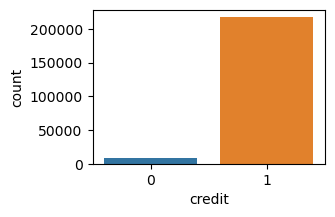

In [36]:
plt.figure(figsize=(3,2))
sns.countplot(x='credit', data=df_model)

In [37]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample (X, y)
y_res.value_counts()

credit
1    217514
0    217514
Name: count, dtype: int64

In [38]:
# Splitting train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (348022, 109) , sedangkan Jumlah baris dan kolom dari y_train adalah: (348022,)
Prosentase Churn di data Training adalah:
credit
1    0.500345
0    0.499655
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (87006, 109) , sedangkan Jumlah baris dan kolom dari y_test adalah: (87006,)
Prosentase Churn di data Testing adalah:
credit
0    0.501379
1    0.498621
Name: proportion, dtype: float64


### Model

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
model_score = {'Name': [], 'Accuracy': [],'Precision': [], 'Recall': [], 'F1_score': [], 'Roc_Auc': [], 'CM': []}
model_score = pd.DataFrame(model_score)

def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Performance evaluation
    def print_scores(alg, y_test, y_pred):
        print(alg_name)
        auc_score = roc_auc_score(y_test, y_pred)
        print("roc_auc: ",auc_score)
        acc_score = accuracy_score(y_test, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_test, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_test, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_test, y_pred, average='weighted')
        print("f1_score: ",f_score)
        cm = confusion_matrix(y_test, y_pred)
        print("confusion_matrix: ",cm)
        model_score.loc[len(model_score.index)] = [alg_name,acc_score,  pre_score,rec_score, f_score,  auc_score, cm]


    print_scores(alg, y_test, y_pred)
    return model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

log_model = modeling(LogisticRegression, 'LogisticRegression')
nb_model = modeling(GaussianNB, "Naive Bayes Classification")
xgb_model = modeling(XGBClassifier, 'XGBoostClassifier')

C:\Users\Lenovo Indonesia\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
roc_auc:  0.6645313095655381
accuracy:  0.9693484561733215
precision:  0.9725573629214693
recall:  0.9961657287873773
f1_score:  0.9633314663749519
confusion_matrix:  [[ 1017  2038]
 [  278 72226]]
Naive Bayes Classification
roc_auc:  0.593686339648646
accuracy:  0.9110099392527694
precision:  0.9673733871426136
recall:  0.9389275074478649
f1_score:  0.9218557385526576
confusion_matrix:  [[  759  2296]
 [ 4428 68076]]
XGBoostClassifier
roc_auc:  0.8743195815326538
accuracy:  0.9889622678966106
precision:  0.9895491803278689
recall:  0.99904832836809
f1_score:  0.9882791493410348
confusion_matrix:  [[ 2290   765]
 [   69 72435]]


In [49]:
model_score

,Name,Accuracy,Precision,Recall,F1_score,Roc_Auc,CM
0,LogisticRegression,0.969348,0.972557,0.996166,0.963331,0.664531,"[[1017, 2038], [278, 72226]]"
1,LogisticRegression,0.969348,0.972557,0.996166,0.963331,0.664531,"[[1017, 2038], [278, 72226]]"
2,Naive Bayes Classification,0.911010,0.967373,0.938928,0.921856,0.593686,"[[759, 2296], [4428, 68076]]"
3,XGBoostClassifier,0.988962,0.989549,0.999048,0.988279,0.874320,"[[2290, 765], [69, 72435]]"


Dengan ini model yang terbaik adalah XGBoostClassifier karena memiliki akurasi yang paling tinggi dan juga nilai AUC yang paling tinggi

## Evaluation

### Hyperparameter Tuning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# xgb_class_params = {"learning_rate": [0.1,0.2,0.3,0.4,0.5], 'max_depth': [1,2,3,4,5,6,7,8],
#                   'subsample':[1.0,2.0,3.0,4.0]}
# grid_xgb_class = GridSearchCV(XGBClassifier(), xgb_class_params, scoring = 'accuracy',cv = StratifiedKFold(n_splits=5), n_jobs=-1)
# grid_xgb_class.fit(x_train, y_train)
# y_pred = grid_xgb_class.predict(x_test)
# best_score = grid_xgb_class.best_score_
# best_params = grid_xgb_class.best_params_
# precision = precision_score(y_test, y_pred)
# roc = roc_auc_score(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)
# print ('Best Parameters is', best_params)
# print ('--')
# print ('ROC Score is', roc)
# print ('--')
# print ('Accuracy is ', accuracy)
# print ('--')
# print ('Precision is ', precision)
# print ('--')
# print ('Recall Score is ', recall)
# print ('--')
# print ('Confusion Matrix\n\n', cm)

### Confusion Matrix

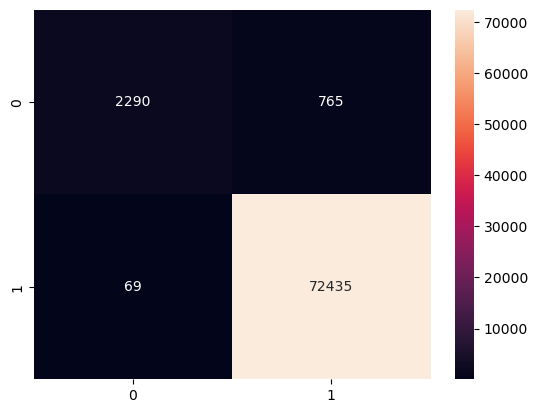

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="g")
plt.show()

### Feature Importance

In [45]:
# FEATURE IMPORTANCE
model = XGBClassifier(learning_rate=0.3,max_depth = 3 ,subsample =1.0)
model.fit(X_train,y_train)
ft_imp = model.feature_importances_
sort = np.argsort(ft_imp)[::-1]
ft = df_model.columns

#score feature importance
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i +1 , 30, ft[sort[i]], ft_imp[sort[i]]))

 1) month_last_pymnt               0.404278
 2) month_last_credit_pull         0.095123
 3) out_prncp                      0.086745
 4) total_rec_late_fee             0.077175
 5) grade                          0.039976
 6) sub_grade                      0.020862
 7) last_pymnt_amnt                0.018341
 8) int_rate                       0.017591
 9) total_pymnt                    0.012496
10) month_issued                   0.011321
11) loan_amnt                      0.011140
12) tot_cur_bal                    0.011005
13) index                          0.009867
14) inq_last_6mths                 0.009709
15) purpose_debt_consolidation     0.008673
16) total_rec_int                  0.008395
17) purpose_credit_card            0.008192
18) total_rev_hi_lim               0.008024
19) term                           0.008019
20) mths_since_last_record         0.007689
21) verification_status_Verified   0.007099
22) total_acc                      0.007008
23) addr_state_GA               